# 1. Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import VotingClassifier

from sklearn import metrics

from scipy.stats import zscore

# 2. Read Data as a Dataframe 

In [268]:
bank_df = pd.read_excel('bank-full.xlsx')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# 3 . EDA

## 3.a Shape of the Data

In [269]:
bank_df.shape

(45211, 17)

## 3.b Data Type

In [270]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<font color='green'> 
****
#### Inference
1. Most of the fields are non-numeric.
2. The non-numeric nature might be because
    a. Catagorical data => Which should be convertedd numbers
    b. not appropriate data (junk characters) => Should be removed and replaced with appropriate values
3.
****
</font>

## 3.c Check the Presence of Missing Values

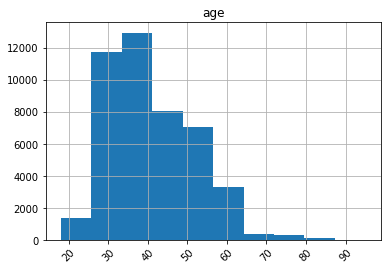

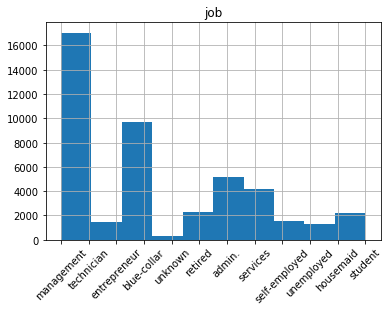

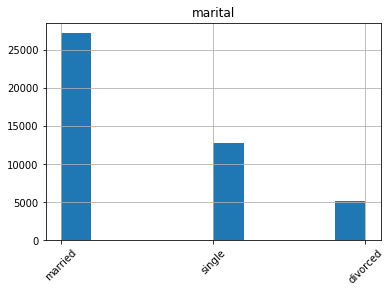

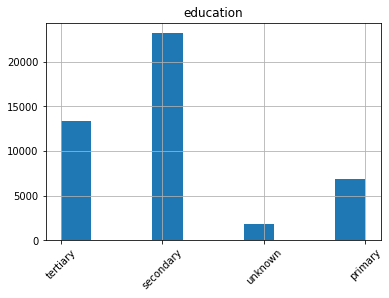

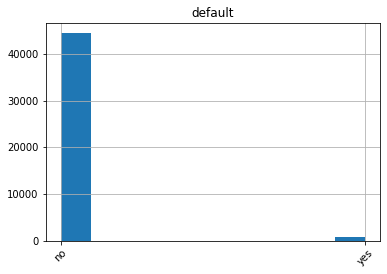

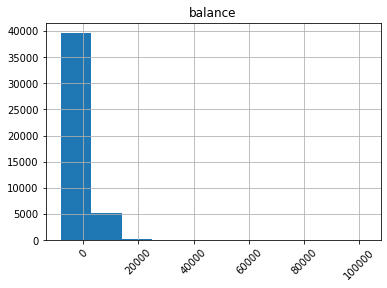

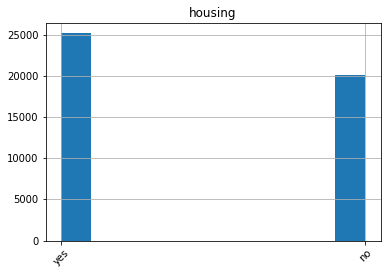

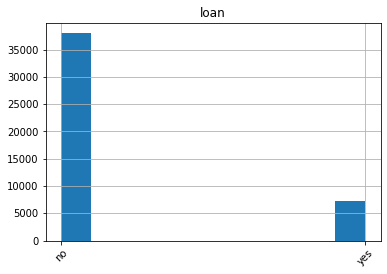

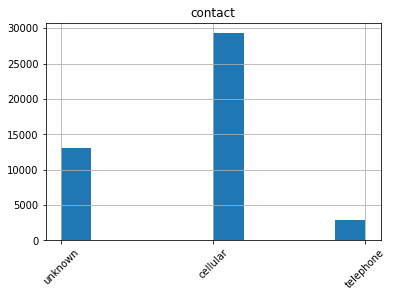

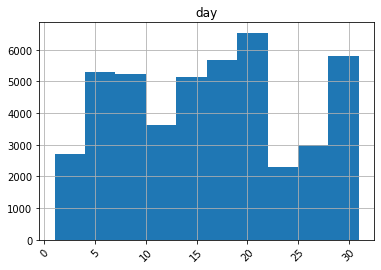

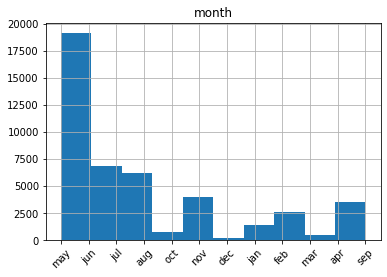

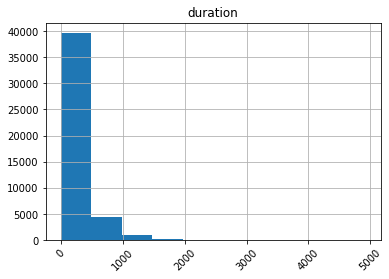

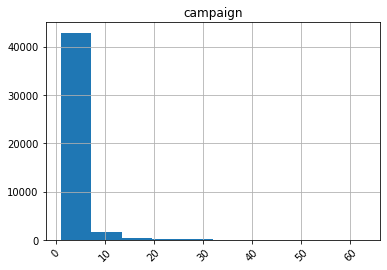

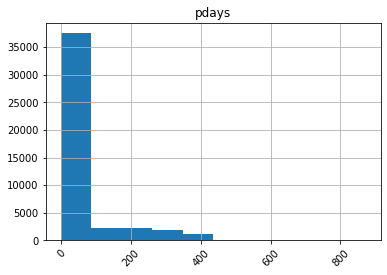

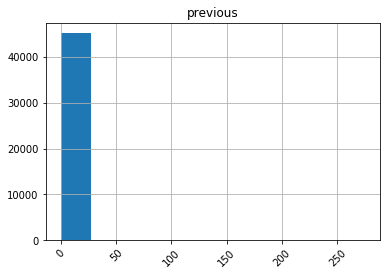

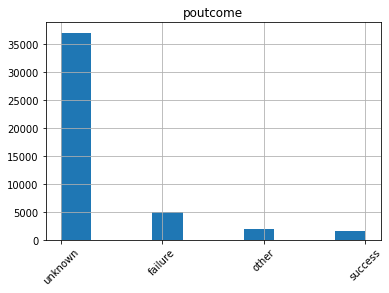

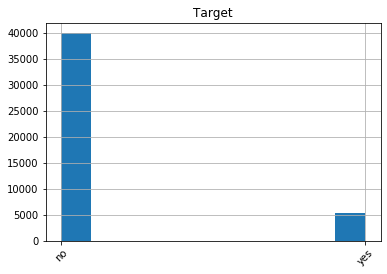

In [271]:
for column in bank_df.columns:
    bank_df[column].hist()
    plt.title(column)
    plt.xticks(rotation=45)   
    plt.show()

#### Checking for null values in the entire data set

In [272]:
sum(bank_df[bank_df.isnull()].count() > 0)    

0

#### Checking for the minimum value of Age so that there are no zeros

In [273]:
bank_df['age'].min()

18

#### Counting the number of "Unknow" values in job column 

In [274]:
bank_df.loc[bank_df['job'] == 'unknown',bank_df.columns == 'job'].count()

job    288
dtype: int64

#### Counting number of records with "unknown" in education

In [275]:
bank_df.loc[bank_df['education'] == 'unknown',bank_df.columns == 'education'].count()

education    1857
dtype: int64

#### Investigating Balance field

In [276]:
bank_df['balance'].value_counts()

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64

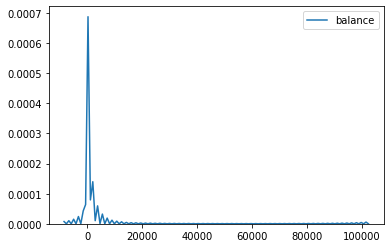

In [277]:
sns.kdeplot(bank_df['balance'])

#### Contact filed has unknow values

In [278]:
bank_df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

#### Duration field analysis

In [279]:
bank_df.loc[bank_df['duration'] < 1,bank_df.columns == 'duration']

,duration
6424,0
22937,0
36425,0


In [280]:
bank_df.loc[bank_df['duration'] < 1,bank_df.columns == 'Target']

,Target
6424,no
22937,no
36425,no


#### Campaign filed analysis

In [281]:
bank_df['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

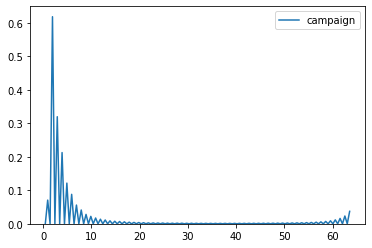

In [282]:
sns.kdeplot(bank_df['campaign'])

#### pdays column analysis

In [283]:
bank_df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

#### Previous Field analysis

In [284]:
bank_df['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

#### "poutcome" Filed Analysis

In [285]:
bank_df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [286]:
bank_df.groupby(['poutcome','Target']).count()

age    job  marital  education  default  balance  housing  \
poutcome Target                                                                
failure  no       4283   4283     4283       4283     4283     4283     4283   
         yes       618    618      618        618      618      618      618   
other    no       1533   1533     1533       1533     1533     1533     1533   
         yes       307    307      307        307      307      307      307   
success  no        533    533      533        533      533      533      533   
         yes       978    978      978        978      978      978      978   
unknown  no      33573  33573    33573      33573    33573    33573    33573   
         yes      3386   3386     3386       3386     3386     3386     3386   

                  loan  contact    day  month  duration  campaign  pdays  \
poutcome Target                                                            
failure  no       4283     4283   4283   4283      4283      4283   4283   
         yes       618      618    618    618       618       618    618   
other    no       1533     1533   1533   1533      1533      1533   1533   
         yes       307      307    307    307       307       307    307   
success  no        533      533    533    533       533       533    533   
         yes       978      978    978    978       978       978    978   
unknown  no      33573    33573  33573  33573     33573     33573  33573   
         yes      3386     3386   3386   3386      3386      3386   3386   

                 previous  
poutcome Target            
failure  no          4283  
         yes          618  
other    no          1533  
         yes          307  
success  no           533  
         yes          978  
unknown  no         33573  
         yes         3386

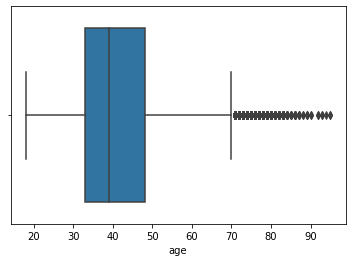

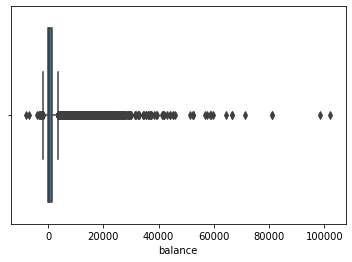

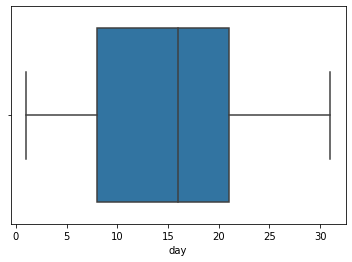

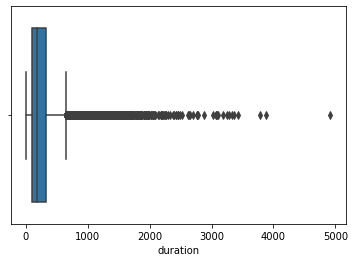

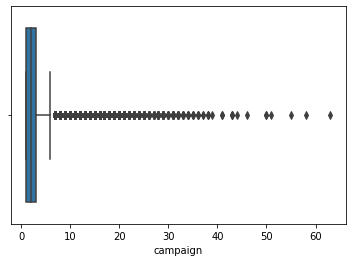

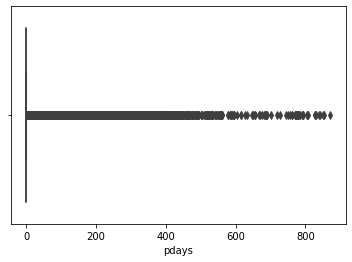

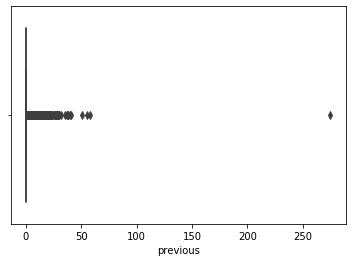

In [287]:
for column in bank_df.columns:
    if (bank_df[column].dtype == 'int64'):
        sns.boxplot(bank_df[column])
        plt.show()

## 3.d 5 point Summary for numeric attributes

In [288]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


<font color='green'> 
****
#### Inference
1. There are no null values in the dataset
2. **Age** : The distribution is a right skewed near gaussian. The minimum value is 18 and the histogram plot suggests that    there are no missing values.
3. **Job** : Job has all the values but very few "unknow" which can be valid input. This field is supposed to be converted    to numeric.  
4. **Marital** : The column has all the values in one among the three catagories. This field should be converted to numeric    as  well.
5. **Education** : The column should be converted to numeric. There are considerable number of records with unknown as a      value.
6. **default** : Default is a catogorical variable that needs to be converted to numeric with no missing values
7. **balance** : The balance field has zeros and data is skewed in distribution.The stddev is very high.
8. **housing** : This field has no missing values. The housing has to be converted to numeric field
9. **loan** : The field has to be converted into numeric values
10. **contact** : The contact field has a lot of "unknow" values.
11. **day** : The values are numeric and there are no missing values.Could be converted into catogorical values by boxing       the days into first 5 days ,second 5 days and so on
12. **months** : The month field has no missing values. This can be converted into numeric by quarter wise as wel.
13. **duration** : The duration is all numeric and has no missing values 
14. **campaign** : The campaign data is right skewed but no missing values.  
15. **pdays** : The pdays data have higher stddev and most of the databeing -1. This value would be of little use.
16. **previous** : The previous data is highly skewed and the data is very much zero.This field can be removed from
    analysis
17. **poutcome** : Major portion of the values are unknow .This field would be of little value to us in the analysis
  
    
    
18. **Target** : The target column has no missing values but the data is very biased so should upsample the data with "no"       category for better estimations.
    
****
</font>

### 3.e Checking the presence of outliers

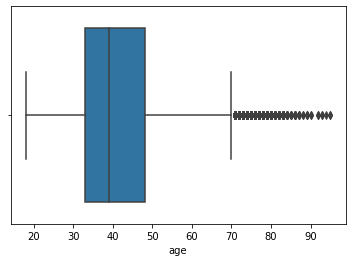

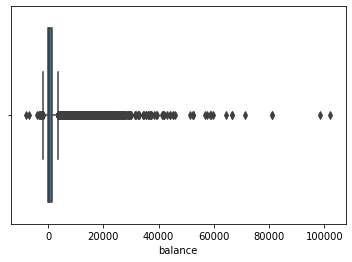

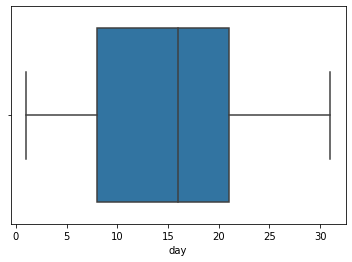

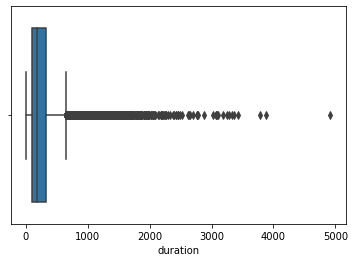

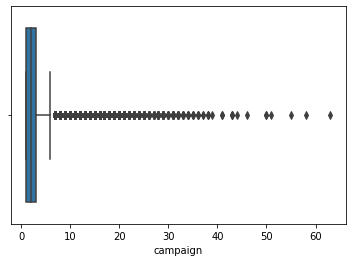

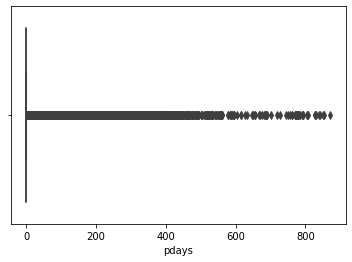

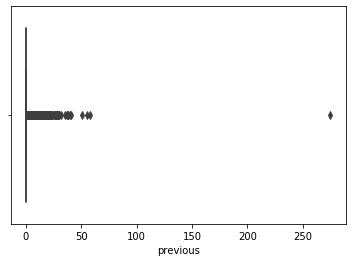

In [289]:
for column in bank_df.columns:
    if (bank_df[column].dtype == 'int64'):
        sns.boxplot(bank_df[column])
        plt.show()

<font color='green'> 
****
#### Inference

Adding to the above analysis. few shout out about outliers from privious notes.

**Balance,duration,campaign,pdays,previous** have lot of outliers. 
Anomg these the fieds pdays,pevious are extremely skewed that they are of little use in a predection
</font>

### 4. Preparing Data

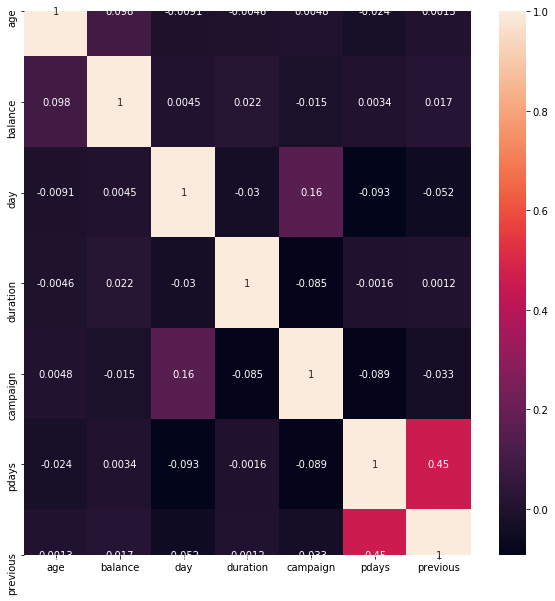

In [290]:
prepped_df = bank_df.copy()

plt.figure(figsize=(10,10))
sns.heatmap(prepped_df.corr(),annot=True)


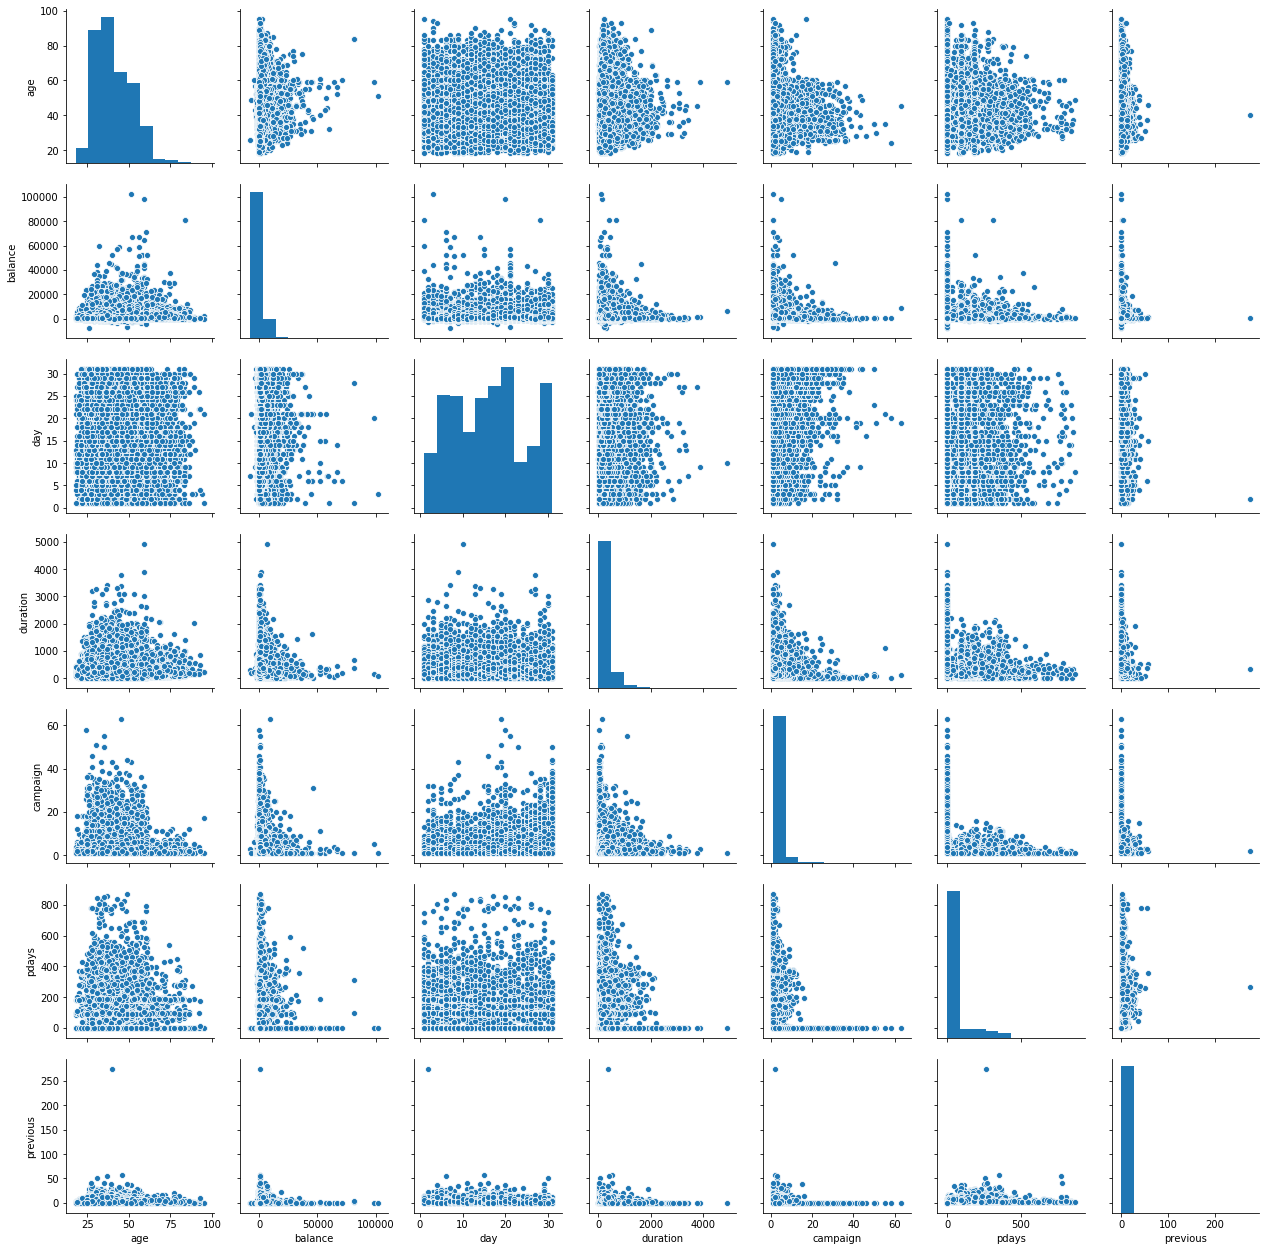

In [455]:
sns.pairplot(prepped_df)

### Converting data to numeric codes

In [292]:
slim_df=prepped_df.drop(['previous','pdays','poutcome','duration'],axis=1)

In [293]:
job_cat=pd.Categorical(prepped_df['job'])
marital_cat=pd.Categorical(prepped_df['marital'])
education_cat=pd.Categorical(prepped_df['education'])
default_cat = pd.Categorical(prepped_df['default'])
balance_cat = pd.Categorical(prepped_df['balance'])
housing_cat = pd.Categorical(prepped_df['housing'])
loan_cat = pd.Categorical(prepped_df['loan'])
contact_cat = pd.Categorical(prepped_df['contact'])
days_cat = prepped_df['day']//5

toQuarter = {'jan':1,'feb':1,'mar':1,'apr':2,'may':2,'jun':2,'jul':3,'aug':3,'sep':3,'oct':4,'nov':4,'dec':4}
month_cat = prepped_df['month'].apply(func=lambda x:toQuarter[x])
target_cat = pd.Categorical(prepped_df['Target'])


In [301]:
slim_df['job'] = job_cat.codes
slim_df['marital'] = marital_cat.codes
slim_df['education'] = education_cat.codes
slim_df['default'] = default_cat.codes
slim_df['balance'] =balance_cat.codes
slim_df['housing'] =housing_cat.codes
slim_df['loan'] =loan_cat.codes
slim_df['contact'] =contact_cat.codes
slim_df['days'] =days_cat
slim_df['month'] = month_cat
slim_df['Target'] = target_cat.codes
slim_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,Target,days
0,58,4,1,2,0,3036,1,0,2,5,2,1,0,1
1,44,9,2,1,0,945,1,0,2,5,2,1,0,1
2,33,2,1,1,0,918,1,1,2,5,2,1,0,1
3,47,1,1,3,0,2420,1,0,2,5,2,1,0,1
4,33,11,2,3,0,917,0,0,2,5,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,1741,0,0,0,17,4,3,1,3
45207,71,5,0,0,0,2639,0,0,0,17,4,2,1,3
45208,72,5,1,1,0,5455,0,0,0,17,4,5,1,3
45209,57,1,1,1,0,1584,0,0,1,17,4,4,0,3


D:\IT\Apps\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\IT\Apps\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


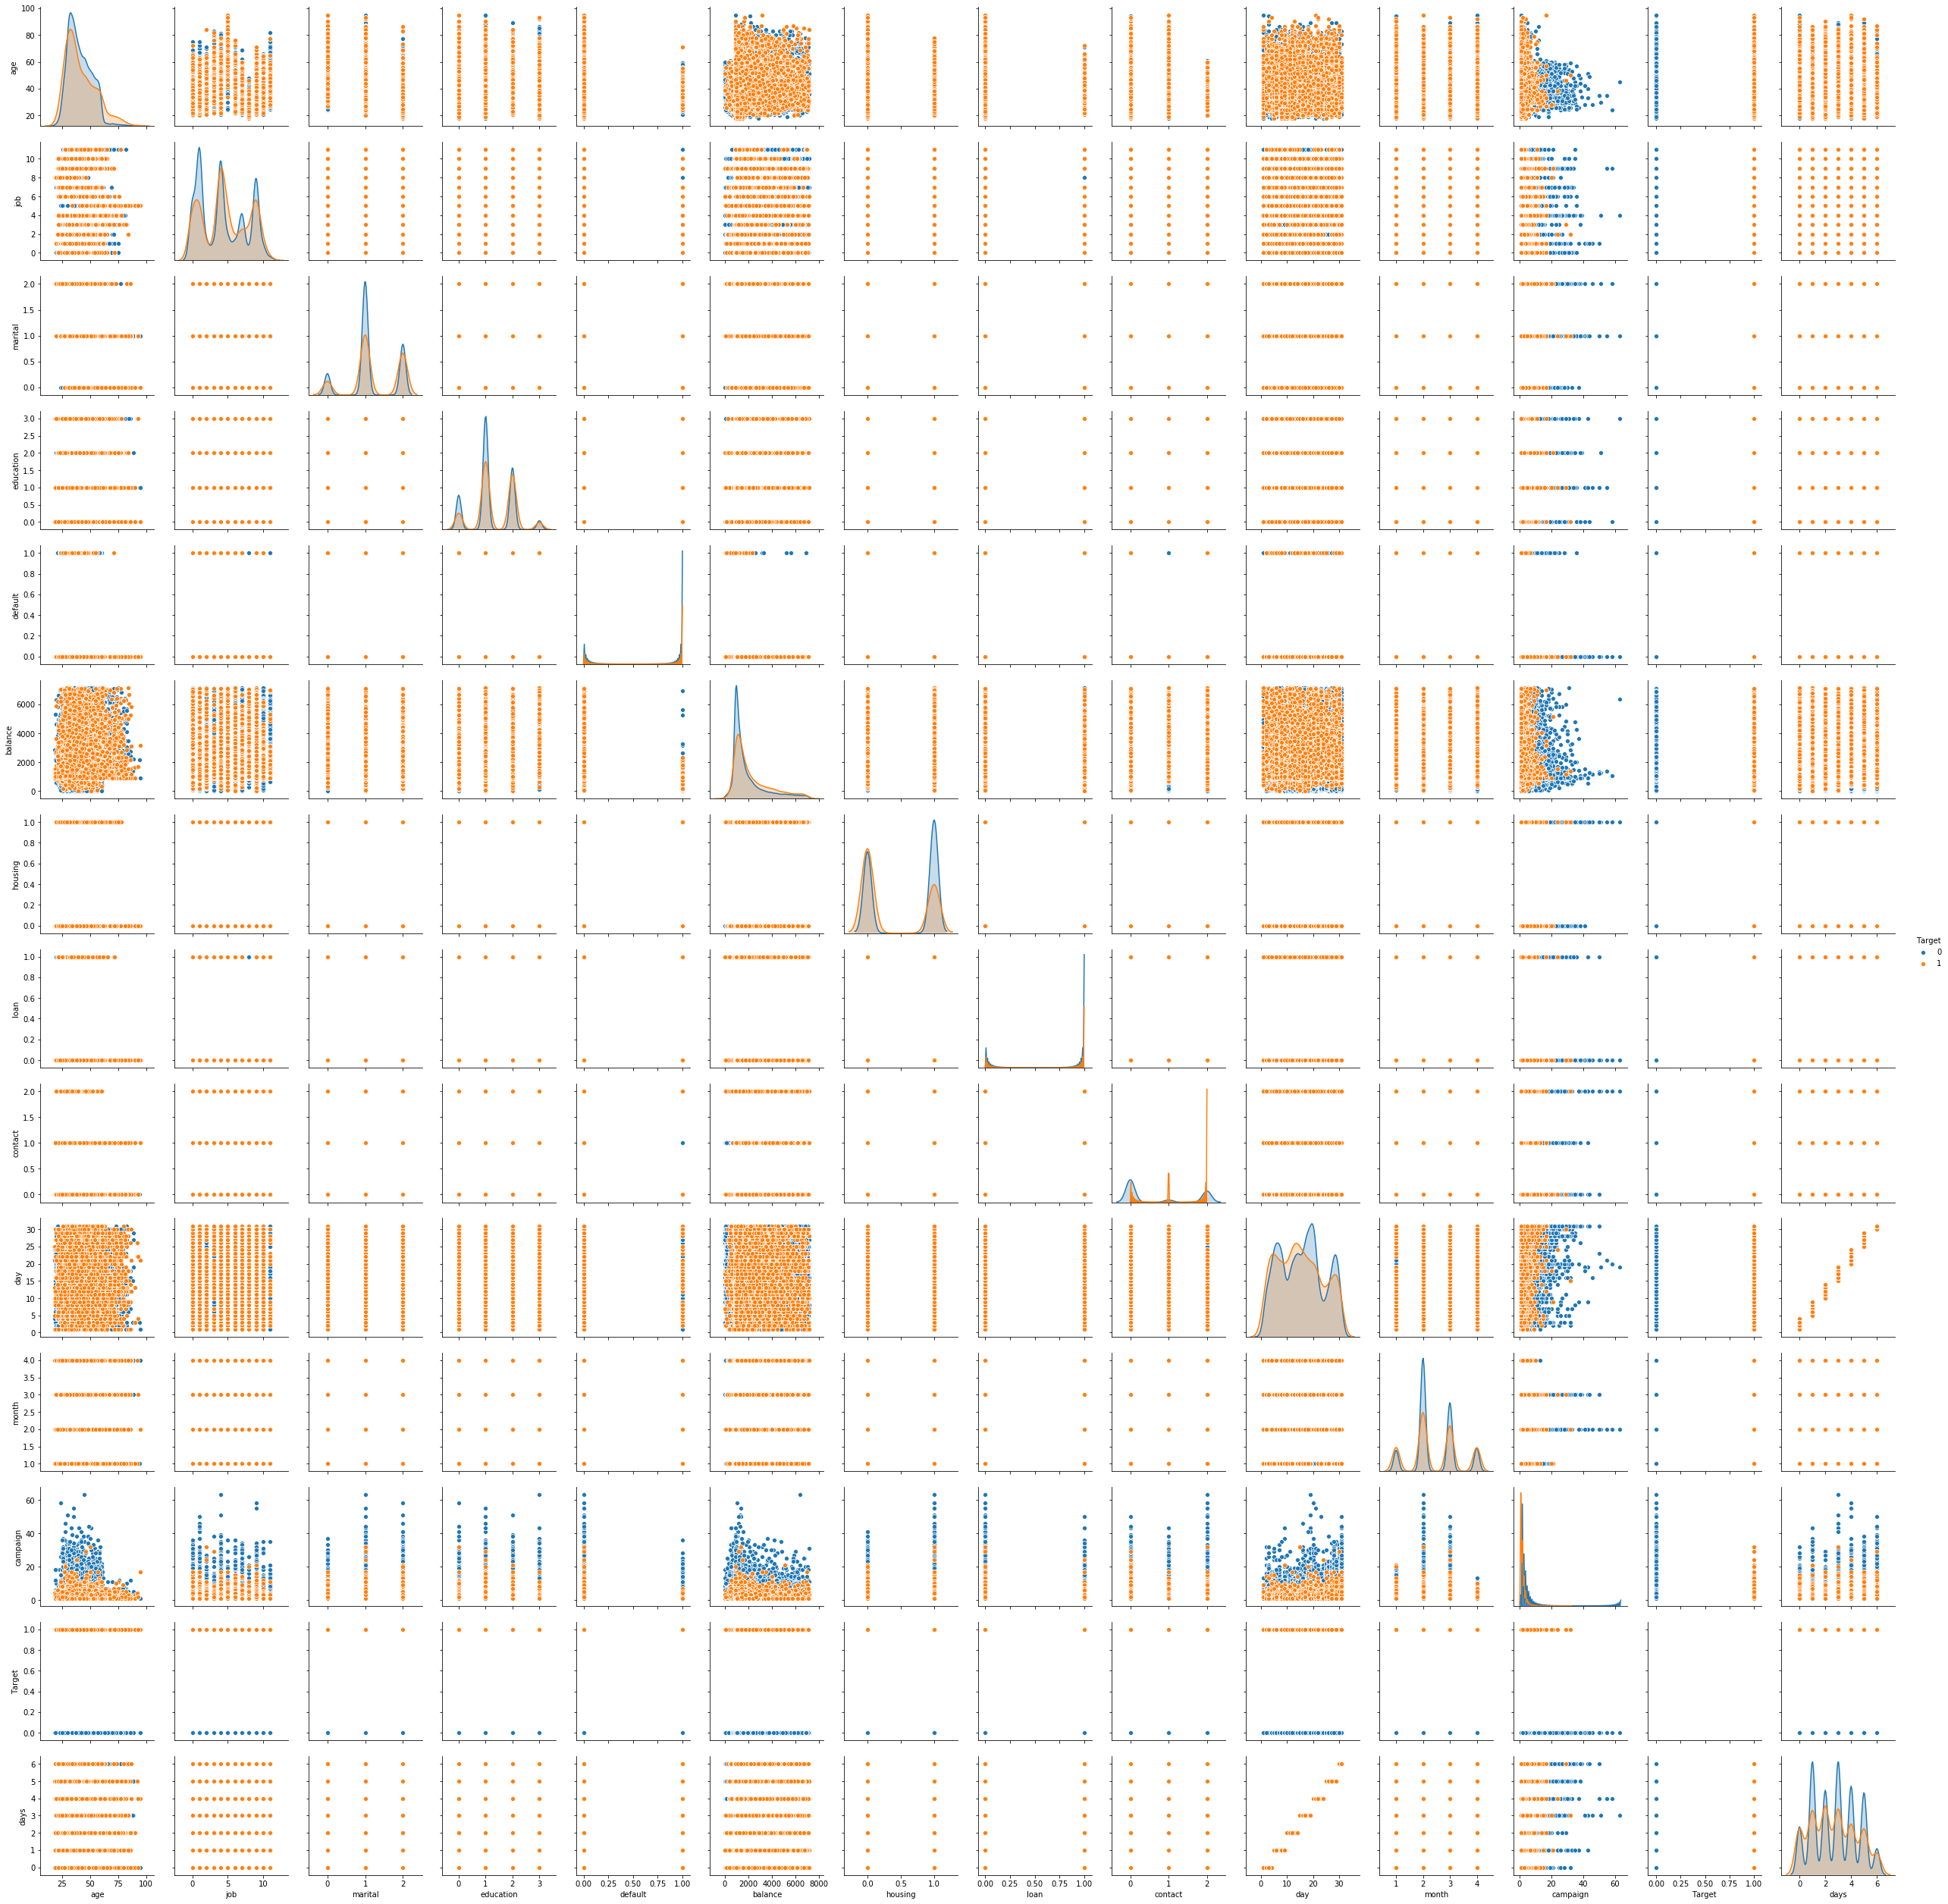

In [456]:
sns.pairplot(slim_df,hue='Target')

### Balancing the data by upsampling

In [304]:
positive = slim_df.loc[slim_df['Target']==1,:]
negitive = slim_df.loc[slim_df['Target']==0,:]

positive.shape,negitive.shape

((5289, 14), (39922, 14))

In [306]:
positive_upsampled = resample(positive, 
                                 replace=True,     # sample with replacement
                                 n_samples=39000,    # to match majority class
                                 random_state=1) # reproducible results
positive_upsampled.shape

(39000, 14)

In [308]:
positive_upsampled['Target'].value_counts()

1    39000
Name: Target, dtype: int64

In [309]:
negitive['Target'].value_counts()

0    39922
Name: Target, dtype: int64

In [310]:
final_df = pd.concat([positive_upsampled,negitive])

In [315]:
final_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,Target,days
44903,38,7,1,1,0,3525,0,0,0,28,3,2,1,5
7632,37,4,0,1,0,932,1,0,2,30,2,1,1,6
42674,59,7,2,1,0,1655,0,0,0,14,1,1,1,2
45006,38,4,1,2,0,1329,0,0,0,13,4,2,1,2
19666,50,9,1,1,0,3948,0,0,0,7,3,1,1,1


In [320]:
X = final_df.loc[:,final_df.columns != 'Target']
y = final_df['Target']

test_size = 0.20
seed=1
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = test_size,random_state=seed)


print("Shapes of test and train data")
print("X_train ="+str(X_train.shape))
print("X_test ="+str(X_test.shape))
print("y_train ="+str(y_train.shape))
print("y_test ="+str(y_test.shape))
X.head()

Shapes of test and train data
X_train =(63137, 13)
X_test =(15785, 13)
y_train =(63137,)
y_test =(15785,)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,days
44903,38,7,1,1,0,3525,0,0,0,28,3,2,5
7632,37,4,0,1,0,932,1,0,2,30,2,1,6
42674,59,7,2,1,0,1655,0,0,0,14,1,1,2
45006,38,4,1,2,0,1329,0,0,0,13,4,2,2
19666,50,9,1,1,0,3948,0,0,0,7,3,1,1


In [321]:
y.head()

44903    1
7632     1
42674    1
45006    1
19666    1
Name: Target, dtype: int8

In [324]:
X_train_z=X_train.apply(zscore)
X_train_z.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,days
12009,0.314159,-0.147013,-0.319914,0.957172,-0.120659,-0.353180,-0.950976,-0.389344,1.866263,0.537450,-0.495388,0.190782,0.749063
22452,0.397903,-0.147013,1.278060,0.957172,-0.120659,-0.783655,-0.950976,-0.389344,-0.589762,0.775125,0.655528,-0.185931,0.749063
32801,-0.355792,-1.383124,1.278060,0.957172,-0.120659,1.586914,1.051551,-0.389344,-0.589762,0.180936,-0.495388,-0.562643,0.172270
33832,0.816623,-1.383124,1.278060,-0.378186,-0.120659,-0.306518,1.051551,-0.389344,-0.589762,1.369315,-0.495388,2.074344,1.325856
21804,1.402831,0.162015,-0.319914,-0.378186,-0.120659,-0.673243,-0.950976,-0.389344,-0.589762,0.537450,0.655528,0.567494,0.749063


In [325]:
X_test_z=X_test.apply(zscore)
X_test_z.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,days
26052,1.144255,-0.782783,-1.923749,0.952380,-0.127372,-0.530265,1.046769,-0.388821,-0.600853,0.417515,1.803835,0.871046,0.170584
32654,-0.934588,-1.091550,-0.328960,-0.388803,-0.127372,-0.773990,-0.955321,-0.388821,-0.600853,0.179793,-0.497150,0.162493,0.170584
44149,-0.685126,-0.165249,1.265829,0.952380,-0.127372,0.517021,-0.955321,-0.388821,-0.600853,-0.295649,0.653343,-0.546059,-0.406004
21548,0.645333,1.378584,-0.328960,-0.388803,-0.127372,-0.503701,-0.955321,-0.388821,-0.600853,0.417515,0.653343,1.933874,0.170584
12795,-0.768280,0.452284,1.265829,0.952380,-0.127372,0.884933,-0.955321,-0.388821,-0.600853,-1.008814,0.653343,-0.546059,-0.982591


In [327]:
y_train.head()

12009    1
22452    1
32801    0
33832    1
21804    0
Name: Target, dtype: int8

In [328]:
y_test.head()

26052    0
32654    1
44149    1
21548    1
12795    1
Name: Target, dtype: int8

# 5. Train with Standalone classification models

### Logestic Regression

In [329]:
from sklearn.linear_model import LogisticRegression

In [351]:
C=[0.001, 0.01, 0.1, 1,2,3,10]
logestic_accuracy=[]
logestic_recall=[]

for c in C:
    log_model = LogisticRegression(C=c)
    log_model.fit(X_train_z,y_train)
    y_predict_log = log_model.predict(X_test_z)
    logestic_accuracy.append(log_model.score(X_test_z,y_test))
    logestic_recall.append(metrics.recall_score(y_test,y_predict_log))
    
print(logestic_accuracy)
print(logestic_recall)

D:\IT\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\IT\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\IT\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\IT\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\IT\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarn

[0.6618308520747546, 0.6643015521064302, 0.664554957237884, 0.6647450110864745, 0.6647450110864745, 0.6648083623693379, 0.6648083623693379]
[0.7036561898652983, 0.7076330981398332, 0.708146247594612, 0.7082745349583066, 0.7082745349583066, 0.7082745349583066, 0.7082745349583066]


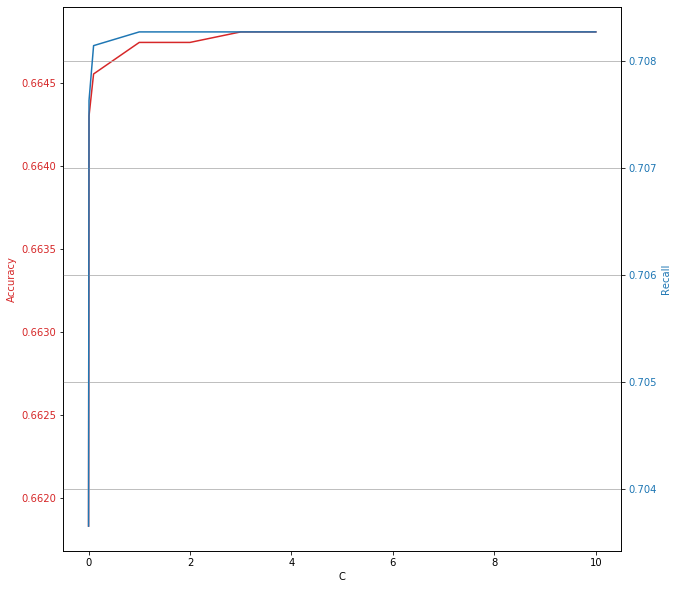

In [352]:
fig, ax1 = plt.subplots()


color = 'tab:red'
ax1.set_xlabel('C')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(C, logestic_accuracy, color=color)
ax1.tick_params(axis='y', labelcolor=color)
    
    
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Recall', color=color)  
ax2.plot(C, logestic_recall, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.set_figheight(10)
fig.set_figwidth(10)

plt.grid(True)
plt.show()

### Best Possible Logestic Model

In [378]:
log_model = LogisticRegression(C=6)
log_model.fit(X_train_z,y_train)
y_predict_log = log_model.predict(X_test_z)
print("Accuracy Score ="+str(log_model.score(X_test_z,y_test)))
print("Recall Score ="+str(metrics.recall_score(y_test,y_predict_log)))
print("Classification Report")
print(metrics.classification_report(y_test,y_predict_log))

D:\IT\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Score =0.6648083623693379
Recall Score =0.7082745349583066
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.62      0.65      7990
           1       0.65      0.71      0.68      7795

    accuracy                           0.66     15785
   macro avg       0.67      0.67      0.66     15785
weighted avg       0.67      0.66      0.66     15785



## KNN Neighbour Classification

In [367]:
odd_numbers_till_30 = np.arange(1,30,2)
errors = []
score = []
recall = []

for n in odd_numbers_till_30:
    print("Running for K="+str(n))
    knn_class = KNeighborsClassifier(n_neighbors=n,weights='distance')
    knn_class.fit(X_train_z, y_train)
    y_predict = knn_class.predict(X_test_z)
    errors.append(np.mean((y_predict - y_test)**2))
    score.append(knn_class.score(X_test_z,y_test))
    recall.append(metrics.recall_score(y_test,y_predict))

Running for K=1
Running for K=3
Running for K=5
Running for K=7
Running for K=9
Running for K=11
Running for K=13
Running for K=15
Running for K=17
Running for K=19
Running for K=21
Running for K=23
Running for K=25
Running for K=27
Running for K=29


### KNN Model Scores

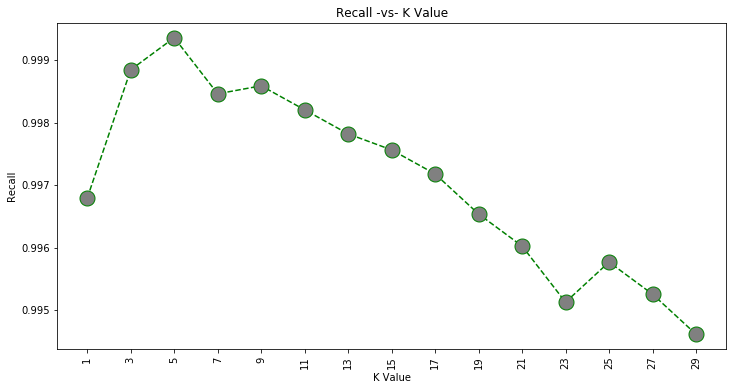

In [370]:
plt.figure(figsize=(12, 6))
plt.plot(odd_numbers_till_30, recall, color='green', linestyle='dashed', marker='o',
         markerfacecolor='grey', markersize=15)
plt.title('Recall -vs- K Value')
plt.xlabel('K Value')
plt.ylabel('Recall')
plt.xticks(odd_numbers_till_30, rotation=90);

### Best model from KNN Model

In [379]:
knn_class = KNeighborsClassifier(n_neighbors=5,weights='distance')
knn_class.fit(X_train_z, y_train)
y_predict = knn_class.predict(X_test_z)
print("Accuracy Score ="+str(knn_class.score(X_test_z,y_test)))
print("Recall Score = "+str(metrics.recall_score(y_test,y_predict)))
print("Classification Report ")
print(metrics.classification_report(y_test,y_predict))

Accuracy Score =0.8758314855875832
Recall Score = 0.9993585631815266
Classification Report 
              precision    recall  f1-score   support

           0       1.00      0.76      0.86      7990
           1       0.80      1.00      0.89      7795

    accuracy                           0.88     15785
   macro avg       0.90      0.88      0.87     15785
weighted avg       0.90      0.88      0.87     15785



## Decision Tree

In [383]:
dtree_accuracy = []
dtree_recall = []
max_depth_list=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160]

for n in max_depth_list:
    dtree = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=n)
    dtree.fit(X_train_z,y_train)
    y_predict_dtree =  dtree.predict(X_test_z)
    dtree_accuracy.append(dtree.score(X_test_z,y_test))
    dtree_recall.append(metrics.recall_score(y_test,y_predict_dtree))

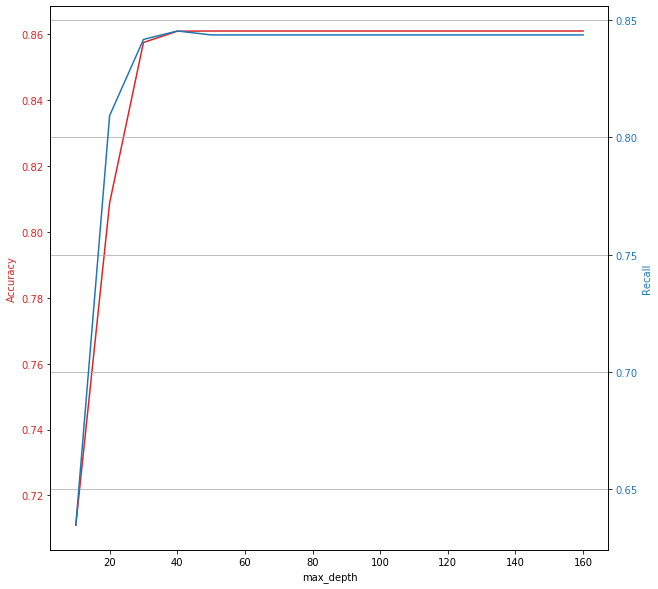

In [384]:
fig, ax1 = plt.subplots()


color = 'tab:red'
ax1.set_xlabel('max_depth')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(max_depth_list, dtree_accuracy, color=color)
ax1.tick_params(axis='y', labelcolor=color)
    
    
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Recall', color=color)  
ax2.plot(max_depth_list, dtree_recall, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.set_figheight(10)
fig.set_figwidth(10)

plt.grid(True)
plt.show()

#### Best Decision Tree Model

In [385]:
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=60)
dtree.fit(X_train_z,y_train)
y_predict_dtree =  dtree.predict(X_test_z)
print("Accuracy Score ="+str(dtree.score(X_test_z,y_test)))
print("Recall Score ="+str(metrics.recall_score(y_test,y_predict_dtree)))
print("Classification Report")
print(metrics.classification_report(y_test,y_predict_dtree))

Accuracy Score =0.8609439341146659
Recall Score =0.8436177036561898
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      7990
           1       0.87      0.84      0.86      7795

    accuracy                           0.86     15785
   macro avg       0.86      0.86      0.86     15785
weighted avg       0.86      0.86      0.86     15785



## SVC  - Support Vector Classification with GridSearch

In [457]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly']
param_grid = {'kernel':kernels, 'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(), param_grid,verbose=2)


#### The below processing is extremely calculation intensive and would take a very long time.(1-day) But since this is a one time activity to find the best possible values we can proceed with caution.

In [ ]:
grid_search.fit(X_train_z, y_train)
grid_search.best_params_

D:\IT\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] .............. C=0.001, gamma=0.001, kernel=linear, total=  48.1s
[CV] C=0.001, gamma=0.001, kernel=linear .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   48.0s remaining:    0.0s


[CV] .............. C=0.001, gamma=0.001, kernel=linear, total=  46.5s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] .............. C=0.001, gamma=0.001, kernel=linear, total=  46.8s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] ................. C=0.001, gamma=0.001, kernel=rbf, total= 1.5min
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] ................. C=0.001, gamma=0.001, kernel=rbf, total= 1.8min
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] ................. C=0.001, gamma=0.001, kernel=rbf, total= 1.8min
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] ................ C=0.001, gamma=0.001, kernel=poly, total= 1.2min
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] ................ C=0.001, gamma=0.001, kernel=poly, total= 1.3min
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] .

[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total= 1.7min
[CV] C=0.01, gamma=0.1, kernel=poly ..................................
[CV] ................... C=0.01, gamma=0.1, kernel=poly, total= 1.2min
[CV] C=0.01, gamma=0.1, kernel=poly ..................................
[CV] ................... C=0.01, gamma=0.1, kernel=poly, total= 1.2min
[CV] C=0.01, gamma=0.1, kernel=poly ..................................
[CV] ................... C=0.01, gamma=0.1, kernel=poly, total= 1.2min
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ................... C=0.01, gamma=1, kernel=linear, total= 1.1min
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ................... C=0.01, gamma=1, kernel=linear, total= 1.1min
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ................... C=0.01, gamma=1, kernel=linear, total= 1.0min
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] .

[CV] ................... C=1, gamma=0.01, kernel=linear, total= 2.8min
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total= 2.9min
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=79.5min
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total= 2.1min
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total= 2.6min
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total= 1.6min
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total= 1.2min
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] .

In [397]:
svc_cls=svm.SVC()
svc_cls.fit(X_train_z, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [399]:
svc_cls.score(X_test_z,y_test)

0.7205574912891987

In [402]:
y_predict = svc_cls.predict(X_test_z)

In [405]:
print("Accuracy Score = "+ str(svc_cls.score(X_test_z,y_test)))
print("Recall Score = "+str(metrics.recall_score(y_test,y_predict)))
print("Classification Report")
print(metrics.classification_report(y_test,y_predict))

Accuracy Score = 0.7205574912891987
Recall Score = 0.7101988454137268
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      7990
           1       0.72      0.71      0.72      7795

    accuracy                           0.72     15785
   macro avg       0.72      0.72      0.72     15785
weighted avg       0.72      0.72      0.72     15785



<font color='green'> 
****
#### Inference
As most of the data is catagorical in nature from the results of DescionTree have very good trade off beween accuracy ,precison and recall.This is the best performing model in the lot.
Logestic Regression was giveing very poor results
Knn also preformed very well as most of the data is catagorical in nature    
****
</font>

# 6. Ensemble Models

## Bagging Classifier With Descision Tree

In [406]:
bag_cls = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                            n_estimators=400,
                            bootstrap=True,
                            max_samples=0.8,
                            n_jobs=-1,
                            oob_score=True
                            
)
bag_cls.fit(X_train_z,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [407]:
bag_cls.oob_score_

0.9621458099054437

In [409]:
y_predict = bag_cls.predict(X_test_z)
print("Accuracy Score = "+ str(bag_cls.score(X_test_z,y_test)))
print("Recall Score = "+str(metrics.recall_score(y_test,y_predict)))
print("Classification Report")
print(metrics.classification_report(y_test,y_predict))

Accuracy Score = 0.9548938866012037
Recall Score = 0.9826812059012188
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      7990
           1       0.93      0.98      0.96      7795

    accuracy                           0.95     15785
   macro avg       0.96      0.96      0.95     15785
weighted avg       0.96      0.95      0.95     15785



## PastingClassifier with Decision Tree Classifier

In [411]:
bag_cls = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                            n_estimators=400,
                            bootstrap=False,
                            max_samples=1.0,
                            n_jobs=-1
                            
)
bag_cls.fit(X_train_z,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [412]:
y_predict = bag_cls.predict(X_test_z)
print("Accuracy Score = "+ str(bag_cls.score(X_test_z,y_test)))
print("Recall Score = "+str(metrics.recall_score(y_test,y_predict)))
print("Classification Report")
print(metrics.classification_report(y_test,y_predict))

Accuracy Score = 0.8721571111815014
Recall Score = 0.8652982681205901
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      7990
           1       0.87      0.87      0.87      7795

    accuracy                           0.87     15785
   macro avg       0.87      0.87      0.87     15785
weighted avg       0.87      0.87      0.87     15785



##  Random Pathces With Decision Tree Classifier

In [415]:
bag_cls = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                            n_estimators=400,
                            bootstrap=False,
                            max_samples=100,
                            bootstrap_features=True,
                            max_features=0.8,
                            n_jobs=-1,
                            
)
bag_cls.fit(X_train_z,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [416]:
y_predict = bag_cls.predict(X_test_z)
print("Accuracy Score = "+ str(bag_cls.score(X_test_z,y_test)))
print("Recall Score = "+str(metrics.recall_score(y_test,y_predict)))
print("Classification Report")
print(metrics.classification_report(y_test,y_predict))

Accuracy Score = 0.690402280646183
Recall Score = 0.6554201411161
Classification Report
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      7990
           1       0.70      0.66      0.68      7795

    accuracy                           0.69     15785
   macro avg       0.69      0.69      0.69     15785
weighted avg       0.69      0.69      0.69     15785



## Classification using Random Forest Classifier

In [418]:
rnd_cls = RandomForestClassifier(n_estimators=600,max_leaf_nodes=12,n_jobs=1)
rnd_cls.fit(X_train_z,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [419]:
y_predict = rnd_cls.predict(X_test_z)
print("Accuracy Score = "+ str(rnd_cls.score(X_test_z,y_test)))
print("Recall Score = "+str(metrics.recall_score(y_test,y_predict)))
print("Classification Report")
print(metrics.classification_report(y_test,y_predict))

Accuracy Score = 0.682166613873931
Recall Score = 0.6074406670942912
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.76      0.71      7990
           1       0.71      0.61      0.65      7795

    accuracy                           0.68     15785
   macro avg       0.69      0.68      0.68     15785
weighted avg       0.69      0.68      0.68     15785



## Classification using ExtraTrees

In [422]:
ext_cls = ExtraTreesClassifier(n_estimators=600,max_leaf_nodes=12,n_jobs=1)
ext_cls.fit(X_train_z,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=12,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [423]:
y_predict = ext_cls.predict(X_test_z)
print("Accuracy Score = "+ str(ext_cls.score(X_test_z,y_test)))
print("Recall Score = "+str(metrics.recall_score(y_test,y_predict)))
print("Classification Report")
print(metrics.classification_report(y_test,y_predict))

Accuracy Score = 0.6622109597719353
Recall Score = 0.6165490699166132
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.71      0.68      7990
           1       0.67      0.62      0.64      7795

    accuracy                           0.66     15785
   macro avg       0.66      0.66      0.66     15785
weighted avg       0.66      0.66      0.66     15785



## Ada Boosting Classifier using Decision Tree classifier

In [436]:
ada_cls = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                            n_estimators=200,
                            algorithm='SAMME',
                            learning_rate=0.6)

ada_cls.fit(X_train_z,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                            

In [437]:
y_predict = ada_cls.predict(X_test_z)
print("Accuracy Score = "+ str(ada_cls.score(X_test_z,y_test)))
print("Recall Score = "+str(metrics.recall_score(y_test,y_predict)))
print("Classification Report")
print(metrics.classification_report(y_test,y_predict))

Accuracy Score = 0.8915426037377256
Recall Score = 0.8824887748556767
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      7990
           1       0.90      0.88      0.89      7795

    accuracy                           0.89     15785
   macro avg       0.89      0.89      0.89     15785
weighted avg       0.89      0.89      0.89     15785



## Gradiant Boosting Classifier

In [445]:
grd_cls = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.3)

grd_cls.fit(X_train_z,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [444]:
y_predict = grd_cls.predict(X_test_z)
print("Accuracy Score = "+ str(grd_cls.score(X_test_z,y_test)))
print("Recall Score = "+str(metrics.recall_score(y_test,y_predict)))
print("Classification Report")
print(metrics.classification_report(y_test,y_predict))

Accuracy Score = 0.7213177066835603
Recall Score = 0.6301475304682489
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      7990
           1       0.76      0.63      0.69      7795

    accuracy                           0.72     15785
   macro avg       0.73      0.72      0.72     15785
weighted avg       0.73      0.72      0.72     15785



## Voting Classifier

In [451]:
voting_cls = VotingClassifier(estimators=[('knn',knn_class)
                                              ,('svc',svc_cls)
                                              ,('dtree',dtree)],
                                  voting='hard')

In [452]:
voting_cls.named_estimators

{'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='distance'),
 'svc': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
     kernel='rbf', max_iter=-1, probability=False, random_state=None,
     shrinking=True, tol=0.001, verbose=False),
 'dtree': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=160,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1, splitter='best')}

In [453]:
voting_cls.fit(X_train_z,y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='distance')),
                             ('svc',
                              SVC(C=1.0, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_function_shape='ovr',
                                  degree=3, gamma='auto_deprecated',
                                  kernel='rbf', max_iter=-1, probability=False,
                                  random_s...
                             ('dtree',
                              DecisionTreeClassifier(class_weight=None,
                                   

In [454]:
y_predict = voting_cls.predict(X_test_z)
print("Accuracy Score = "+ str(voting_cls.score(X_test_z,y_test)))
print("Recall Score = "+str(metrics.recall_score(y_test,y_predict)))
print("Classification Report")
print(metrics.classification_report(y_test,y_predict))

Accuracy Score = 0.8772885650934431
Recall Score = 0.9241821680564465
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      7990
           1       0.84      0.92      0.88      7795

    accuracy                           0.88     15785
   macro avg       0.88      0.88      0.88     15785
weighted avg       0.88      0.88      0.88     15785



<font color='green'> 

### Inference

1. Ensemnle models perform way better than individual models.But however they come with a lot of computational expense
2. **Bagging Classifier with Descision Tree and AdaBoost Classifier with DecisionTree** Have given the best of scores.
    Below listed is the best of performance from **Baggind Classifier with Decision Tree**

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      7990
           1       0.93      0.98      0.96      7795

       accuracy                           0.95     15785
       macro avg       0.96      0.96      0.95     15785
        weighted avg       0.96      0.95      0.95     15785




3. Since most of the data is catagorical in nature Decision tree had very good results.
4. Pushing imagination further would be to be able to use voting classifier with the Bagging and Boosing Classifiers
5. Give the nature of Descision Tree to produce independent estimators it is very sucessfull when used with Ensemble          techniques.
6. This shows in the classification reports above.Tunning the Gradiant Boosting for beter hyperparameters as we did with      Bagging would pump up its performace as well.




</font>